# Midterm Exam (part 3) - Computational Physics 2

- **Deadline: Friday 10th February 2023 (by the end of the day)**


- When you finish this part, please send the **.ipynb file** via email to wbanda@yachaytech.edu.ec


- **This part can be submitted individually or in pairs.** It includes application problems in physics.


- You can call your notebook with your surname/s, e.g. **name/s-midterm-p3.ipynb**, and also include your name/s on the notebook.


## Instructions:


- Within a single python notebook, solve the following problems using python code:

## Name:

In [191]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sympy import sin, cos
import scipy.integrate as sint

from scipy.integrate import odeint
import glob
from PIL import Image


### 12. (5 points) Euler methods: Electric circuit

Consider the electric circuit of the figure below. The circuit contains an electromotive force $E$ supplied by a battery, a resistance $R$, an inductor $L$, and a capacitor $C$, in series. If the charge on the capacitor at time $t$ is $Q=Q(t)$, then the current is the rate of change with respect to time, i.e. $I=\frac{dQ}{dt}$. The voltage drops across the resistor, inductor and capacitor are $RL$, $L\frac{dI}{dt}$, and $\frac{Q}{C}$, respectively.

**Kirchhoff's Voltage Law** states that the algebraic sum of the potential differences in any loop must be equal to zero, so we get the following ODE:

$$L\frac{dI}{dt} + RI + \frac{Q}{C}= E(t)$$

Since $I=\frac{dQ}{dt}$, 

$$L\frac{d^2Q}{dt^2} + R\frac{dQ}{dt} + \frac{Q}{C}= E(t)$$




We want to find the charge and current at time $t$ in this circuit, for which we consider a resistance of $R= 40\, \Omega$, $L = 1\,\rm H$, $C= 16\times10^{-4}\,\rm F$, and $E(t) = 100\,\rm V\cos(10\,s^{-1}\,t)$ for $0\leq t \leq 2\,\rm s$. The initial charge and current are both equal to $0$.


**12.1. (1 point)** Write down the ODE (in the correct units) using the constants and function defined above.


**12.2. (1 point)** Use sympy to find the analytical solution for $Q(t)$, and make a plot of $Q(t)$ vs. $t$. Does the circuit reach steady state?


**12.3. (1 point)** Reduce the order of the ODE to first order, and write down the relevant explicit, implicit and trapezoidal Euler matrix equations. Hint: First define $S(t)$ and find $\frac{dS}{dt}$, then substitute into the explicit, implicit and trapezoidal Euler formulae reviewed in class.


**12.4. (1 point)** Implement the explicit, implicit and trapezoidal Euler methods to find numerical solutions for $Q(t)$.


**12.5. (1 point)** Make a plot of $Q(t)$ vs. $t$ comparing the numerical solutions with the analytical solution. Which method produces the best results?

Reference image:

https://github.com/wbandabarragan/computational-physics-2/blob/main/exams/circuit.png

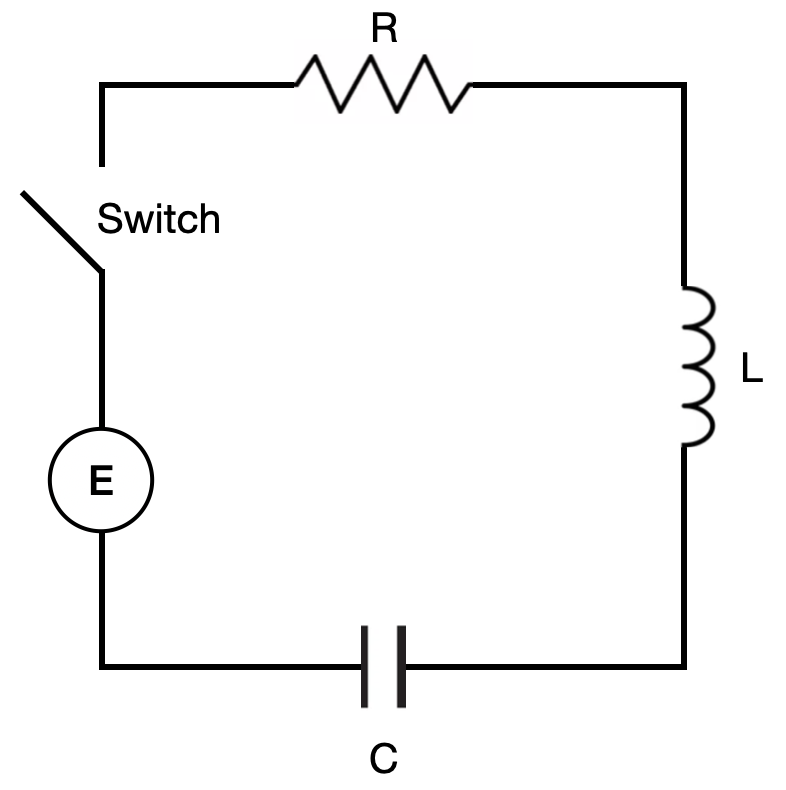

### 13. (5 points) FFT method for fluid dynamics: 1D Shock waves

We wish to study the emergence of 1D shock waves in fluids. To do this we will modify our one-way wave equation to account for non-linear convection, i.e. we will consider that the speed of an initial Gaussian density perturbation $\rho(x, 0) = 4\,e^{-x^2}$ propagating across a periodic 1D domain is not constant, but a function of the density itself, so that our PDE becomes:

$$\frac{\partial \rho}{\partial t} + \rho\frac{\partial \rho}{\partial x} =0$$


As we see from the above equation, portions of $\rho$ with larger amplitudes will convect more rapidly, giving rise to wave steepening (i.e. to a discontinuity, which we call a **shock wave**). Without a diffusive term, the shock would become infinitely steep. Therefore, we add a diffusive (parabolic) term to our PDE so that the shock maintains a finite width. Our PDE then becomes:

$$\frac{\partial \rho}{\partial t} + \rho\frac{\partial \rho}{\partial x} =\alpha\frac{\partial^2 \rho}{\partial x^2}$$

where $\alpha$ is a diffusion constant.


**13.1. (1 point)** Create an appropriate domain and a reasonable time vector for the problem, and make a plot of the initial density profile.




In [162]:
# Length of domain
L = 10

# Number of points 
N = 100

# Step size
delta_x = L/N

# X-axis vector

x_axis = np.arange(-L/2, +L/2, delta_x)

In [248]:
# Time step

t_step = 0.005

m = 150 #Length t axis 

t_axis = np.arange(0, m*t_step, t_step)

print(t_axis[-1])

0.745


In [249]:
# Initial condition

rho_0 = 4*np.exp(-x_axis**2)

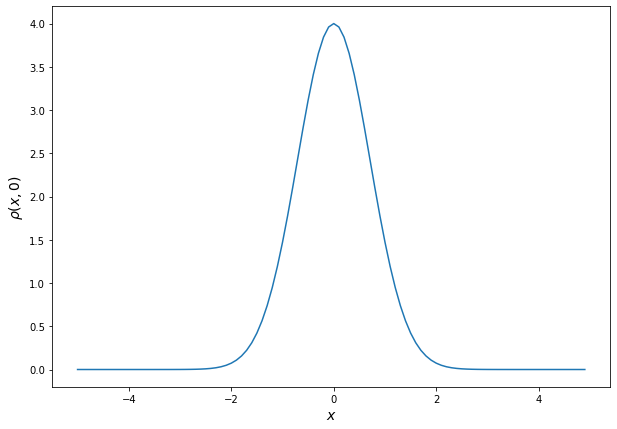

In [250]:
# Plotting

plt.figure(figsize=(10, 7))

plt.plot(x_axis, rho_0)

plt.xlabel(r'$x$', size = 14)
plt.ylabel(r'$\rho(x,0)$', size = 14)

plt.show()

**13.2. (2 point)** Find the solution, $\rho(x,t)$, **using the FFT method.** Hint: write a python function for the right-hand-side (RHS) of the PDE that allows you to map in and out of the Fourier domain at each time. Note that this PDE is non-linear, so the function should return the RHS in real space.




In [251]:
# Wavemunbers - spatial frequencies:

k_numbers = 2*np.pi*np.fft.fftfreq(len(x_axis), d=delta_x)

In [253]:
# Function to get RHS

def RHS_ODE(rho_0, t_axis, k_numbers, alp):

    # Initial condition to Fourier space
    rho_hat = np.fft.fft(rho_0)

    # Factor in front of u_hat in Fourier space
    duhat = (1j)*(k_numbers)*rho_hat

    dduhat = -(k_numbers**2)*rho_hat

    #spatial domain    
    du =  np.fft.ifft(duhat).real

    ddu = np.fft.ifft(dduhat).real

    #ODE in real space
    dudt = -rho_0*du + alp*ddu
        
    return dudt


**13.3. (1 point)** Feed a scipy ODE integrator with the function you created in the previous step. Hint: choose a reasonable value for the diffusion constant, $\alpha$, and make sure you feed the correct wavenumbers to the ODE integrator.




In [254]:
# Call ODE integrator
alp = 0.1

solution_spatial_01 = sint.odeint(RHS_ODE, rho_0,\
                       t_axis, args = (k_numbers, alp))

print(solution_spatial.shape)

(13, 100)


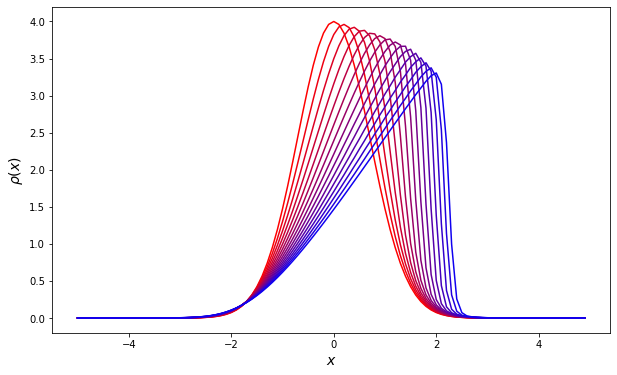

In [255]:
# Add colour

R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0

plt.figure(figsize= (10, 6))

for j in range(0, m, 10):
    plt.plot(x_axis, solution_spatial_01[j, :], color = [R[j], G, B[j]])

plt.xlabel(r'$x$', size = 14)
plt.ylabel(r'$\rho(x)$', size = 14)

plt.show()

**13.4. (1 point)** Repeat the above calculations for two additional $\alpha$ values (one of them should be 0). Then, make a movie with three panels comparing the results for different $\alpha$ values and briefly discuss the role of this parameter in regulating the morphology of the shock wave.

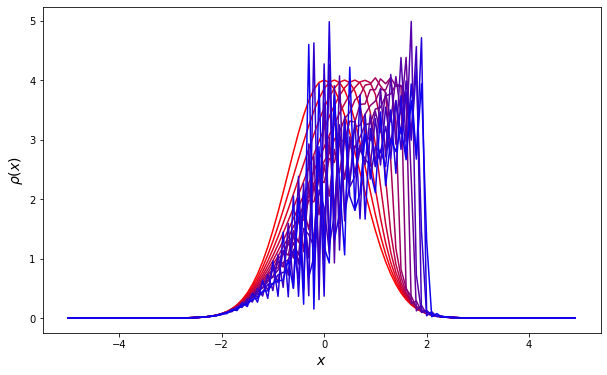

In [258]:
# Call ODE integrator
alp = 0.0

solution_spatial_0 = sint.odeint(RHS_ODE, rho_0,\
                       t_axis, args = (k_numbers, alp))
# Add colour

R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0

plt.figure(figsize= (10, 6))

for j in range(0, m, 10):
    plt.plot(x_axis, solution_spatial_0[j, :], color = [R[j], G, B[j]])

plt.xlabel(r'$x$', size = 14)
plt.ylabel(r'$\rho(x)$', size = 14)

plt.show()

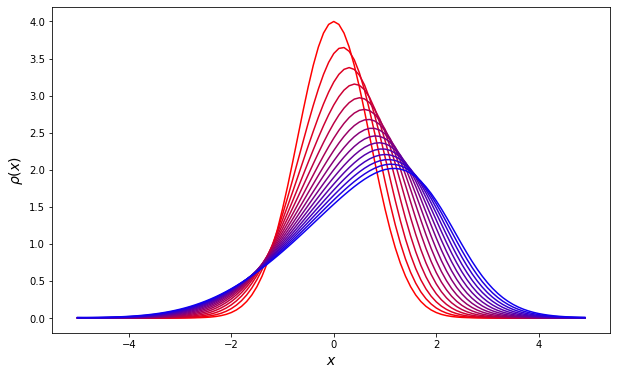

In [257]:
# Call ODE integrator
alp = 1.0

solution_spatial_1 = sint.odeint(RHS_ODE, rho_0,\
                       t_axis, args = (k_numbers, alp))
# Add colour

R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0

plt.figure(figsize= (10, 6))

for j in range(0, m, 10):
    plt.plot(x_axis, solution_spatial_1[j, :], color = [R[j], G, B[j]])

plt.xlabel(r'$x$', size = 14)
plt.ylabel(r'$\rho(x)$', size = 14)

plt.show()

In [259]:
# Colors
R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0
  
images = 120

for j in range(0,  m, 4):
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30,18))
    
    #First Panel
    ax1.plot(x_axis, solution_spatial_01[j, :], color = [R[j], G, B[j]])
    
    ax1.set_xlabel(r'$x$', size = 24)
    ax1.set_ylabel(r'$\rho(x)$', size = 24)
    ax1.tick_params(axis = 'both', which = 'major', labelsize = 16)
    
    ax1.set_ylim([-0.2, 4.2])
    ax1.set_xlim([-4, 4.])
    
    #Second Panel
    
    ax2.plot(x_axis, solution_spatial_0[j, :], color = [R[j], G, B[j]])
    
    ax2.set_xlabel(r'$x$', size = 24)
    ax2.set_ylabel(r'$\rho(x)$', size = 24)
    ax2.tick_params(axis = 'both', which = 'major', labelsize = 16)
    
    ax2.set_ylim([-0.2, 4.2])
    ax2.set_xlim([-4, 4])
    # Third Panel
    
    ax3.plot(x_axis, solution_spatial_1[j, :], color = [R[j], G, B[j]])
    
    ax3.set_xlabel(r'$x$', size = 24)
    ax3.set_ylabel(r'$\rho(x)$', size = 24)
    ax3.tick_params(axis = 'both', which = 'major', labelsize = 16)
    
    ax3.set_ylim([-0.2, 4.2])
    ax3.set_xlim([-4., 4.])
    
    plt.savefig("./wave1D{:03d}.png".format(j))
    
    plt.close()

In [260]:
images_in = "./wave****.png"

gif_image_out = "./animation_wave.gif"

imgs = (Image.open(f) for f in sorted(glob.glob(images_in)))

img = next(imgs)

img.save(fp = gif_image_out, format='GIF', append_images=imgs, save_all=True, duration=100, loop=0)

In [ ]:
# Method 2

In [231]:
import numpy as np
from scipy.integrate import odeint


############## SET-UP THE PROBLEM ###############

mu = 1
nu = 0.1 #kinematic viscosity coefficient
    
#Spatial mesh
L_x = 10 #Range of the domain according to x [m]
dx = 0.01 #Infinitesimal distance
N_x = int(L_x/dx) #Points number of the spatial mesh
X = np.linspace(-L_x,L_x,N_x) #Spatial array

#Temporal mesh
L_t = 0.5 #Duration of simulation [s]
dt = 0.01  #Infinitesimal time
N_t = int(L_t/dt) #Points number of the temporal mesh
T = np.linspace(0,L_t,N_t) #Temporal array

#Wave number discretization
k = 2*np.pi*np.fft.fftfreq(N_x, d = dx)


#Def of the initial condition    
u0 = 4*np.exp(-X**2) #Single space variable fonction that represent the wave form at t = 0
# viz_tools.plot_a_frame_1D(X,u0,0,L_x,0,1.2,'Initial condition')

############## EQUATION SOLVING ###############

#Definition of ODE system (PDE ---(FFT)---> ODE system)
def burg_system(u,t,k,mu,nu):
    #Spatial derivative in the Fourier domain
    u_hat = np.fft.fft(u)
    u_hat_x = 1j*k*u_hat
    u_hat_xx = -k**2*u_hat
    
    #Switching in the spatial domain
    u_x = np.fft.ifft(u_hat_x)
    u_xx = np.fft.ifft(u_hat_xx)
    
    #ODE resolution
    u_t = -mu*u*u_x + nu*u_xx
    return u_t.real
    

#PDE resolution (ODE system resolution)
U = odeint(burg_system, u0, T, args=(k,mu,nu,), mxstep=100)




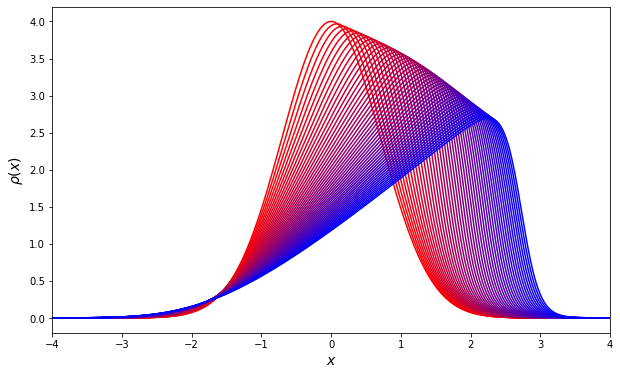

In [232]:
# Add colour

R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0

plt.figure(figsize = (10, 6))

for j in range(0, m):
    plt.plot(X, U[j, :], color = [R[j], G, B[j]])

plt.xlabel(r'$x$', size = 14)
plt.ylabel(r'$\rho(x)$', size = 14)

plt.xlim(-4,4)
plt.show()

In [ ]:
# Add colour

R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0

plt.figure(figsize= (10, 6))

for j in range(0, m):
    plt.plot(x_axis, solution_spatial_01[j, :], color = [R[j], G, B[j]])

plt.xlabel(r'$x$', size = 14)
plt.ylabel(r'$\rho(x)$', size = 14)

plt.show()